In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import seaborn as sns

In [2]:
prostate = pd.read_table("prostate.data")

In [3]:
prostate

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [4]:
prostate.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['Unnamed: 0', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp',
        'gleason', 'pgg45', 'lpsa', 'train'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=97, step=1)
 FloatBlock: [1 2 4 6 9], 5 x 97, dtype: float64
 IntBlock: [0 3 5 7 8], 5 x 97, dtype: int64
 ObjectBlock: slice(10, 11, 1), 1 x 97, dtype: object,
 '_item_cache': {},
 '_attrs': {}}

In [5]:
prostate.__class__

pandas.core.frame.DataFrame

In [6]:
prostate.drop(prostate.columns[0], axis=1, inplace=True)
prostate

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [7]:
prostate.train.replace(to_replace=['F', 'T'], value=[0, 1], inplace=True)

In [8]:
prostate

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,1
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,1
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,1
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,1
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,1
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,1
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,1
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,0
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,1


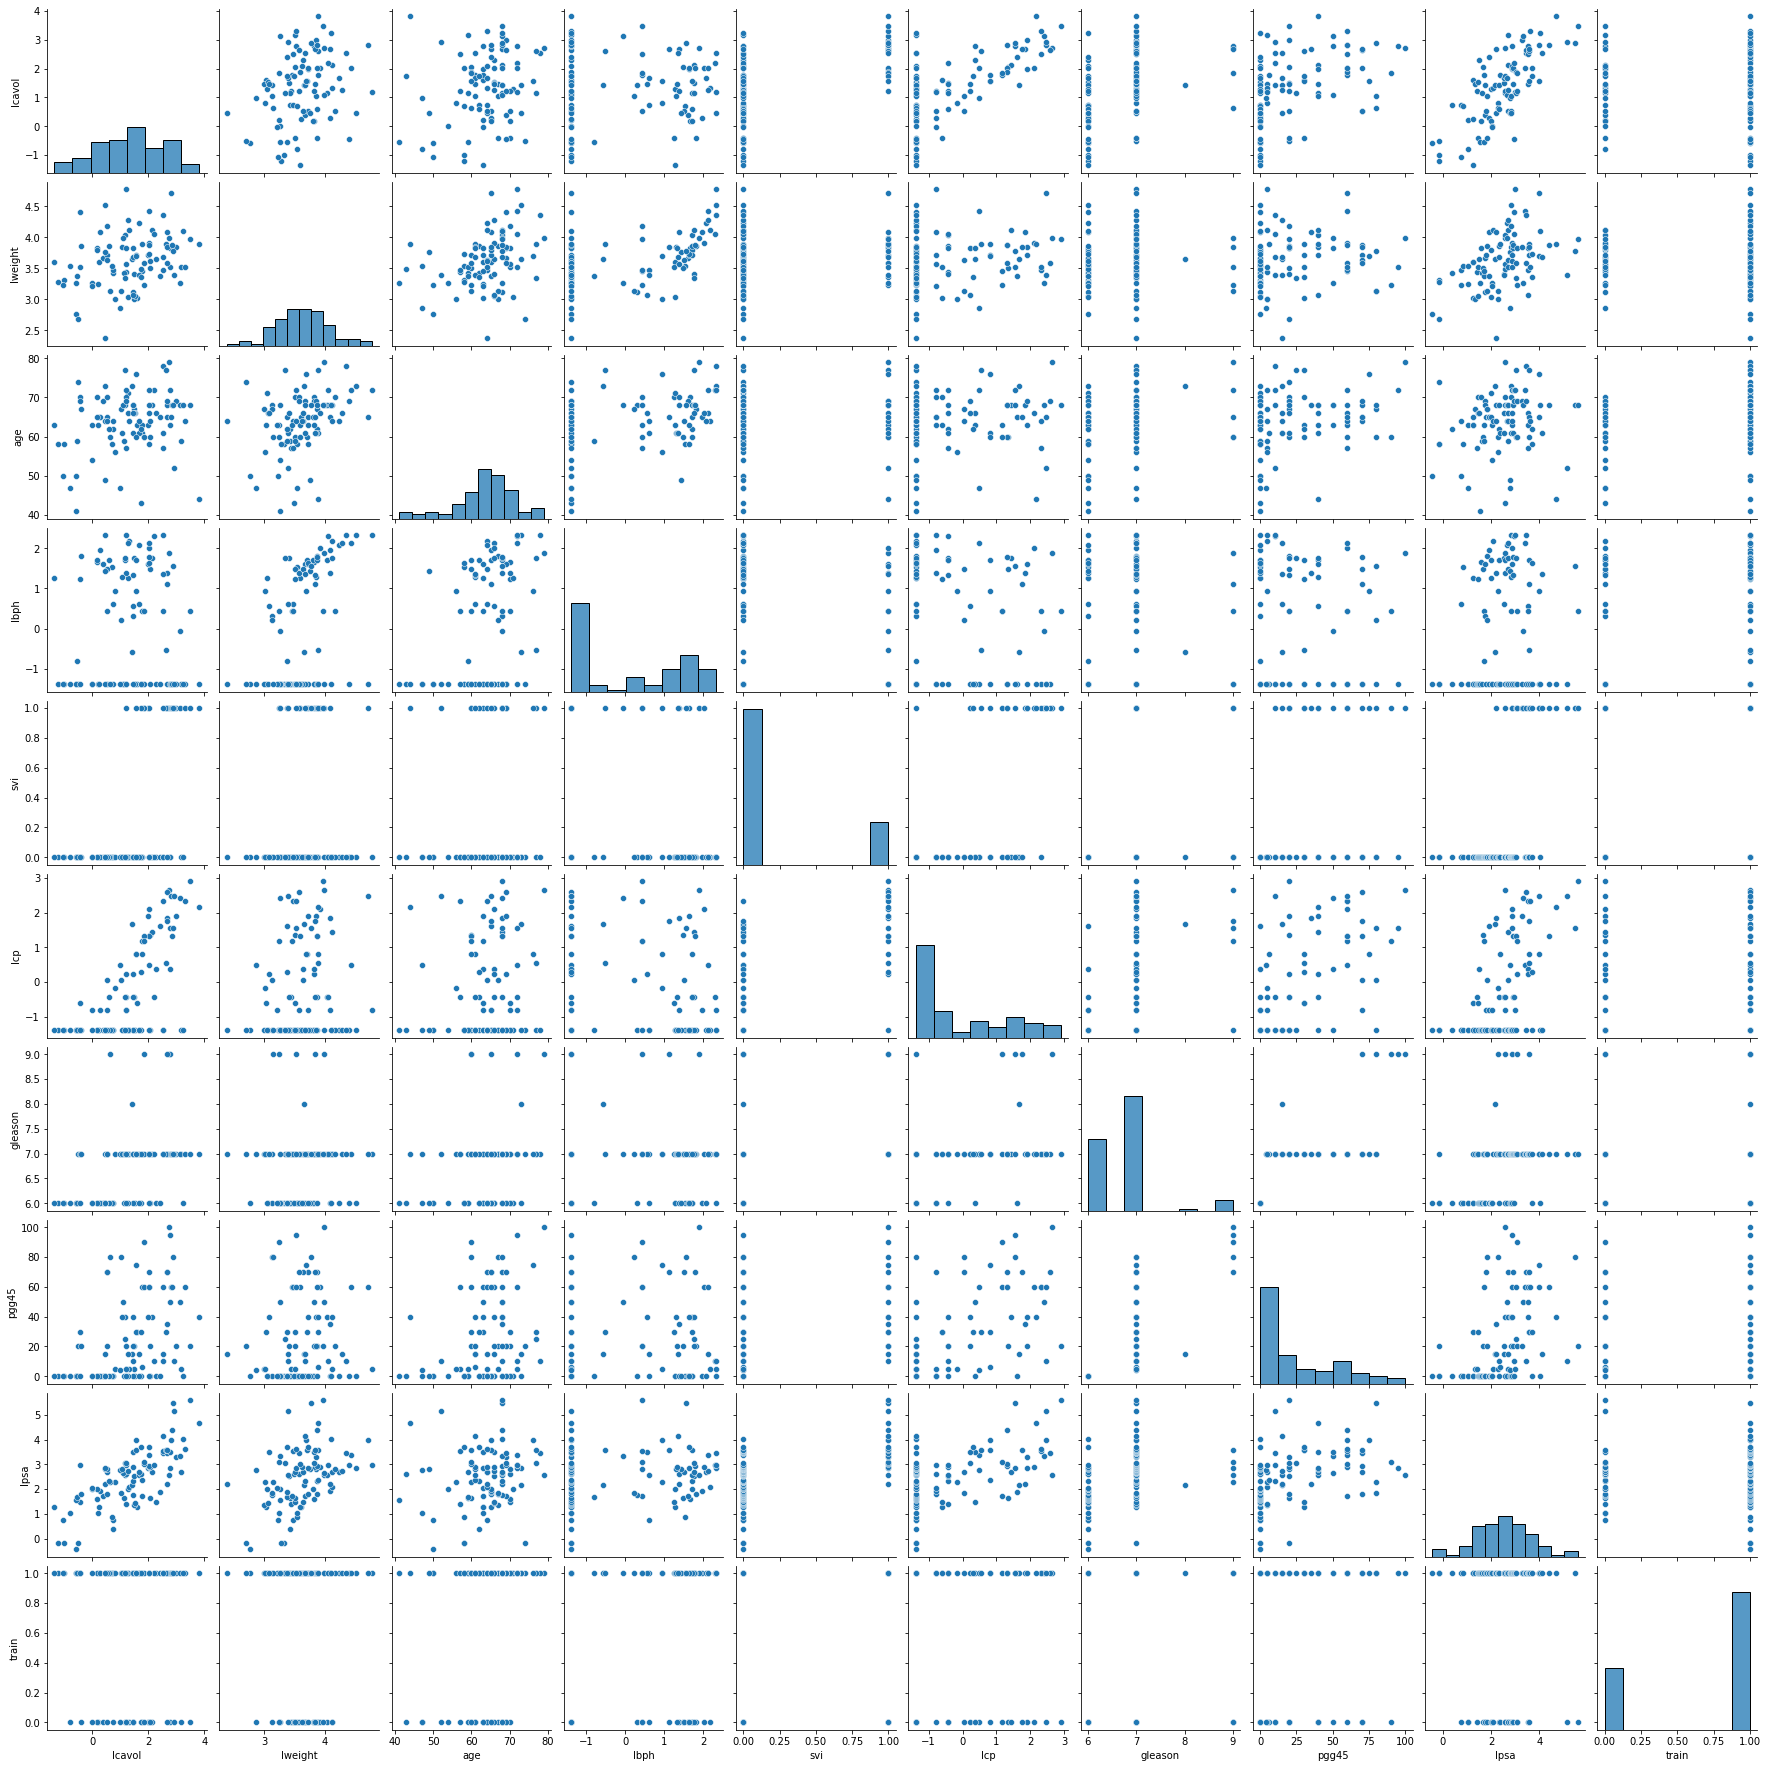

In [9]:
sns.pairplot(prostate)

In [10]:
prostate.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387,0.690722
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329,0.464597
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516,1.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357,1.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932,1.000000


In [11]:
prostate["train"]

0     1
1     1
2     1
3     1
4     1
     ..
92    1
93    1
94    0
95    1
96    0
Name: train, Length: 97, dtype: int64

In [12]:
prostate.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
        'lpsa', 'train'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=97, step=1)
 FloatBlock: [0 1 3 5 8], 5 x 97, dtype: float64
 IntBlock: [2 4 6 7 9], 5 x 97, dtype: int64,
 '_item_cache': {'train': 0     1
  1     1
  2     1
  3     1
  4     1
       ..
  92    1
  93    1
  94    0
  95    1
  96    0
  Name: train, Length: 97, dtype: int64},
 '_attrs': {}}

In [13]:
prostate.__class__

pandas.core.frame.DataFrame

In [14]:
prostate.loc[:, prostate.columns != "train"]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


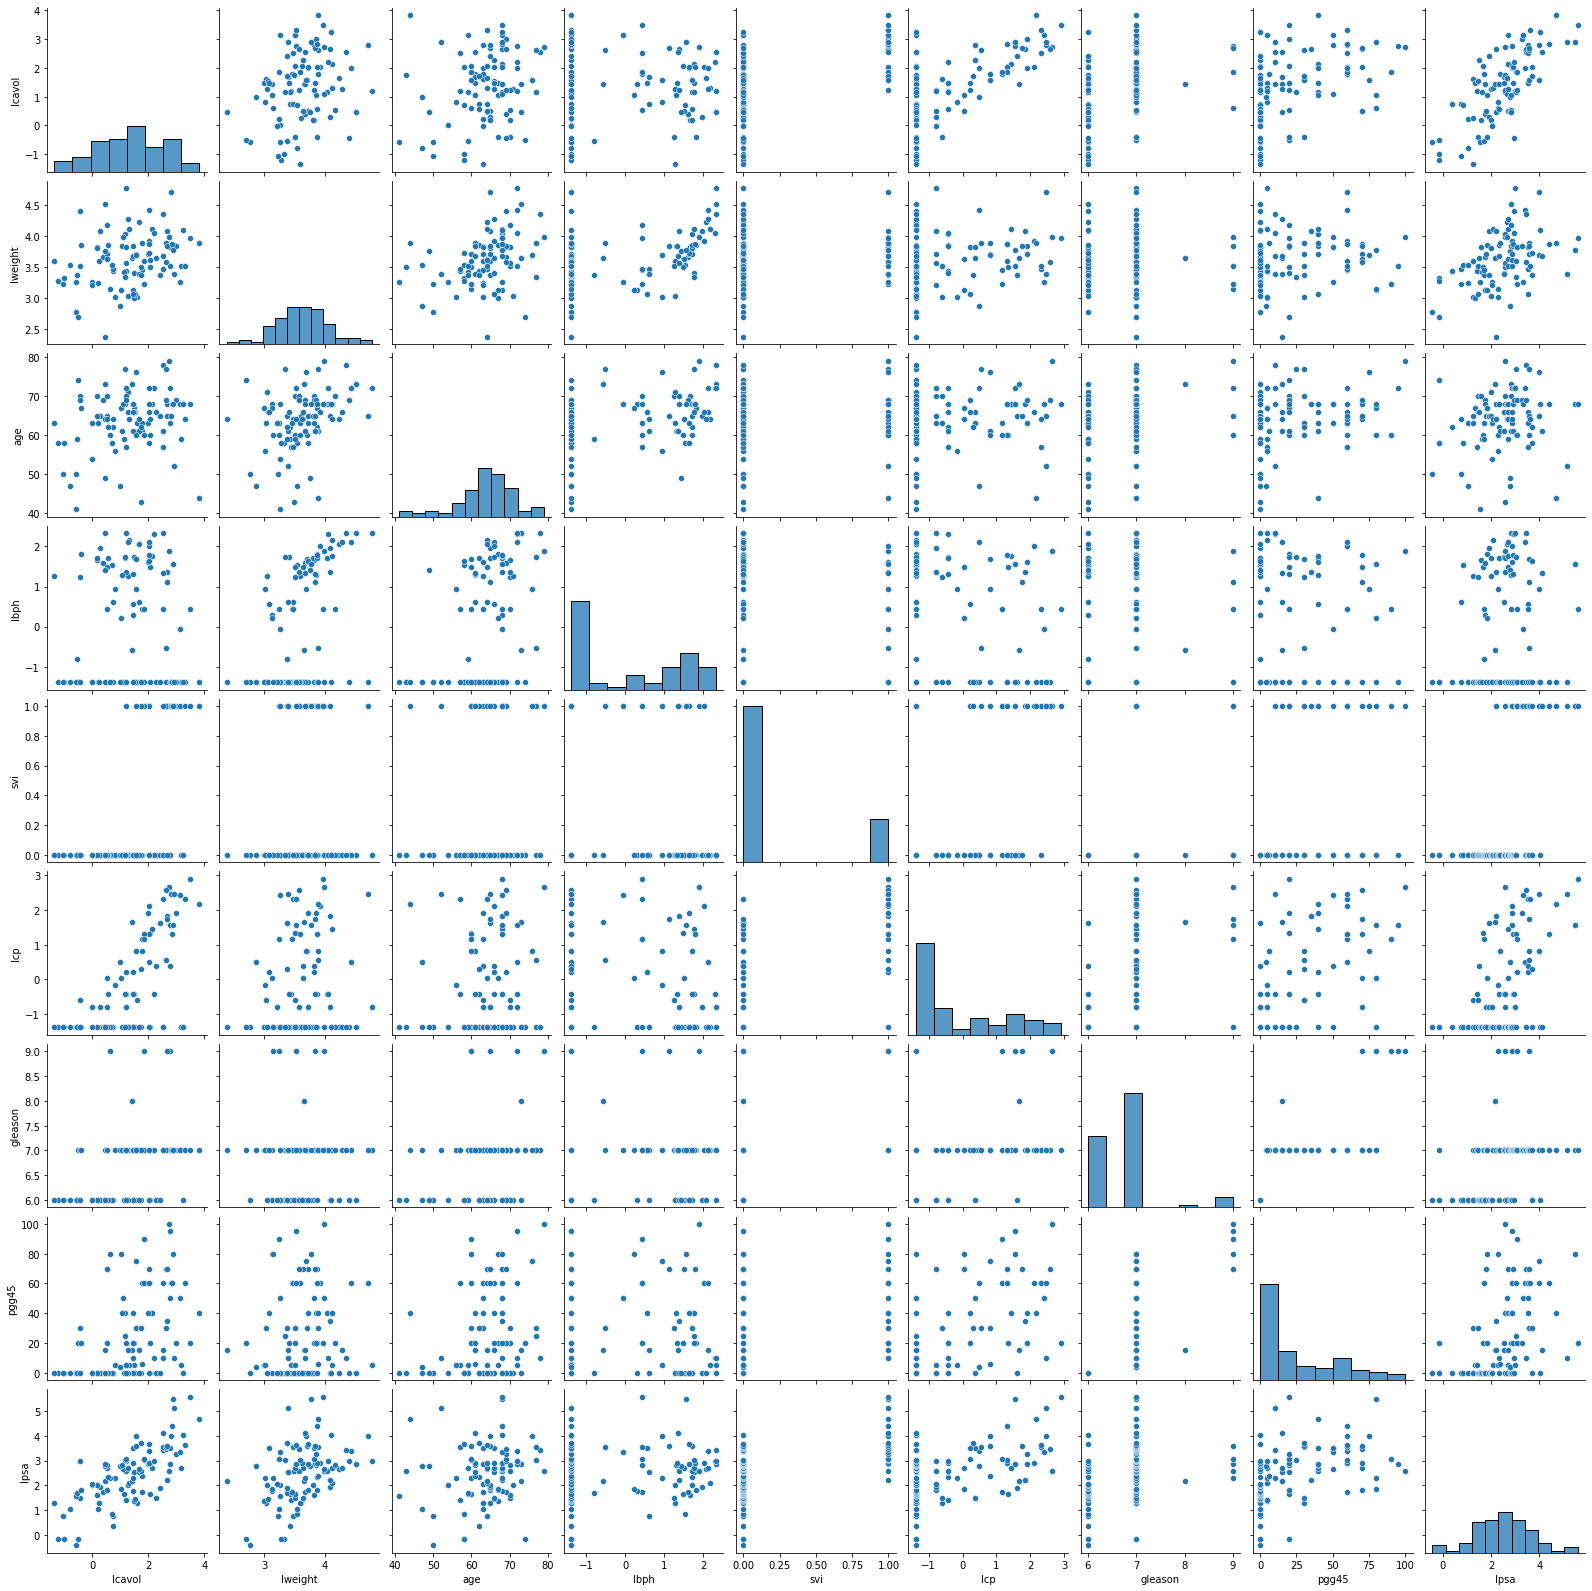

In [15]:
sns.pairplot(prostate.loc[:, prostate.columns != "train"])

In [16]:
prostate.loc[:, prostate.columns.isin(['lcavol','lweight','age','lbph','lpsa'])]

,lcavol,lweight,age,lbph,lpsa
0,-0.579818,2.769459,50,-1.386294,-0.430783
1,-0.994252,3.319626,58,-1.386294,-0.162519
2,-0.510826,2.691243,74,-1.386294,-0.162519
3,-1.203973,3.282789,58,-1.386294,-0.162519
4,0.751416,3.432373,62,-1.386294,0.371564
...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,4.385147
93,3.821004,3.896909,44,-1.386294,4.684443
94,2.907447,3.396185,52,-1.386294,5.143124
95,2.882564,3.773910,68,1.558145,5.477509


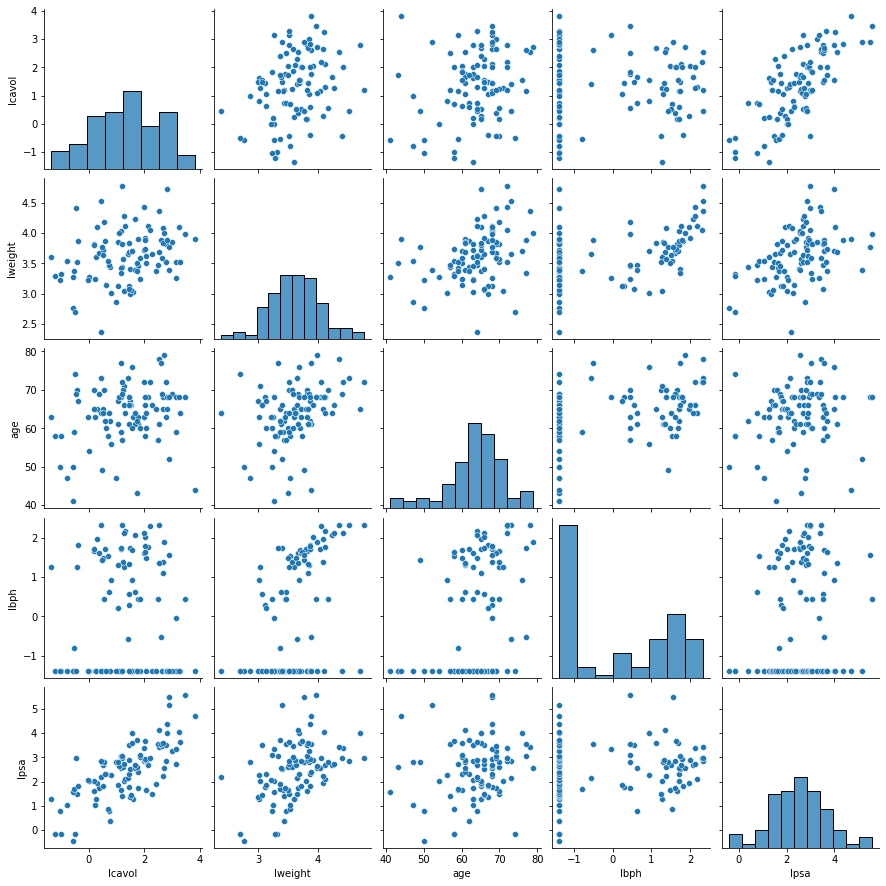

In [17]:
sns.pairplot(prostate.loc[:, prostate.columns.isin(['lcavol','lweight','age','lbph','lpsa'])])

<AxesSubplot:xlabel='lcavol', ylabel='lpsa'>

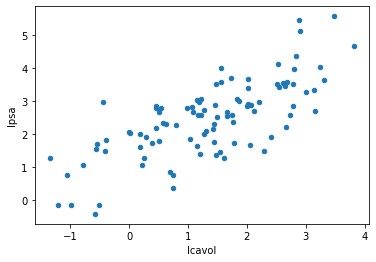

In [18]:
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
prostate.plot.scatter('lcavol', 'lpsa', ax = ax)

<AxesSubplot:xlabel='lweight', ylabel='lpsa'>

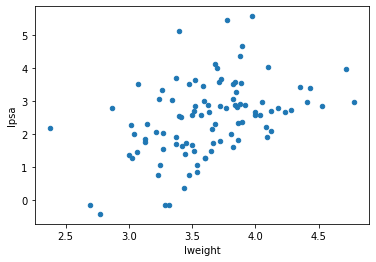

In [19]:
fig, ax = plt.subplots()
prostate.plot.scatter('lweight', 'lpsa', ax = ax)

<AxesSubplot:xlabel='age', ylabel='lpsa'>

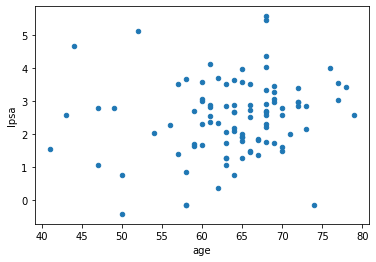

In [20]:
fig, ax = plt.subplots()
prostate.plot.scatter('age', 'lpsa', ax = ax)

<AxesSubplot:xlabel='svi', ylabel='lpsa'>

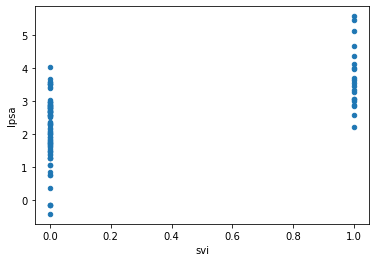

In [21]:
fig, ax = plt.subplots()
prostate.plot.scatter('svi', 'lpsa', ax = ax)

<AxesSubplot:title={'center':'lpsa'}, xlabel='svi'>

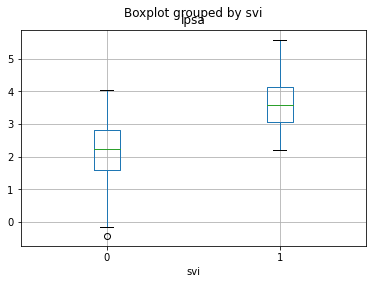

In [22]:
fig, ax = plt.subplots()
prostate.boxplot('lpsa', 'svi', ax = ax)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
prostate_train = prostate.loc[prostate['train'] == 1]
prostate_train

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,1
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,1
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,1
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,1
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,1
...,...,...,...,...,...,...,...,...,...,...
90,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0,4.029806,1
91,2.532903,3.677566,61,1.348073,1,-1.386294,7,15,4.129551,1
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,1
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,1


In [75]:
prostate_test = prostate.loc[prostate['train'] == 0]
prostate_test

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,0
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,0
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,0
14,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717,0
21,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228,0
24,0.385262,3.667400,69,1.599388,0,-1.386294,6,0,1.731656,0
25,1.446919,3.124565,68,0.300105,0,-1.386294,6,0,1.766442,0
27,-0.400478,3.865979,67,1.816452,0,-1.386294,7,20,1.816452,0
31,0.182322,3.804438,65,1.704748,0,-1.386294,6,0,2.008214,0
33,0.009950,3.267666,54,-1.386294,0,-1.386294,6,0,2.021548,0


In [76]:
X_train = prostate_train.filter(['lcavol','lweight','age','lbph'], axis=1)
X_train

,lcavol,lweight,age,lbph
0,-0.579818,2.769459,50,-1.386294
1,-0.994252,3.319626,58,-1.386294
2,-0.510826,2.691243,74,-1.386294
3,-1.203973,3.282789,58,-1.386294
4,0.751416,3.432373,62,-1.386294
...,...,...,...,...
90,3.246491,4.101817,68,-1.386294
91,2.532903,3.677566,61,1.348073
92,2.830268,3.876396,68,-1.386294
93,3.821004,3.896909,44,-1.386294


In [77]:
y_train = prostate_train.filter(['lpsa'], axis=1)
y_train

,lpsa
0,-0.430783
1,-0.162519
2,-0.162519
3,-0.162519
4,0.371564
...,...
90,4.029806
91,4.129551
92,4.385147
93,4.684443


In [78]:
X_test = prostate_test.filter(['lcavol','lweight','age','lbph'], axis=1)
X_test

,lcavol,lweight,age,lbph
6,0.737164,3.473518,64,0.615186
8,-0.776529,3.539509,47,-1.386294
9,0.223144,3.244544,63,-1.386294
14,1.205971,3.442019,57,-1.386294
21,2.059239,3.501043,60,1.474763
24,0.385262,3.667400,69,1.599388
25,1.446919,3.124565,68,0.300105
27,-0.400478,3.865979,67,1.816452
31,0.182322,3.804438,65,1.704748
33,0.009950,3.267666,54,-1.386294


In [79]:
y_test = prostate_test.filter(['lpsa'], axis=1)
y_test

,lpsa
6,0.765468
8,1.047319
9,1.047319
14,1.398717
21,1.658228
24,1.731656
25,1.766442
27,1.816452
31,2.008214
33,2.021548


In [80]:
from sklearn import preprocessing

X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train_scaled

array([[-1.53517959, -1.81097918, -1.98042525, -1.00347165],
       [-1.87122084, -0.64791082, -0.90602451, -1.00347165],
       [-1.47923712, -1.97632998,  1.24277698, -1.00347165],
       [-2.04127153, -0.72578526, -0.90602451, -1.00347165],
       [-0.45575567, -0.40956052, -0.36882414, -1.00347165],
       [-1.91627934, -0.83986455, -1.98042525, -1.00347165],
       [-0.50300267, -0.18307203, -0.90602451,  1.00876737],
       [-0.85856191, -0.04644453,  0.03407614, -1.00347165],
       [-2.15730403, -0.05798078, -0.23452404,  0.82296074],
       [ 0.24320332, -1.27528029, -0.23452404, -1.00347165],
       [ 0.13261939, -1.32735303,  0.30267633, -1.00347165],
       [ 0.1846029 , -1.19454345,  0.16837624, -1.00347165],
       [-1.4019554 , -0.23274323,  0.70557661,  0.80727054],
       [ 0.79056879,  0.04915392,  0.16837624, -1.00347165],
       [-1.52082799, -0.75775571, -3.18912609, -1.00347165],
       [-0.9172027 ,  0.42125665,  0.70557661,  1.09230947],
       [-0.13467239, -0.

In [81]:
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test_scaled

array([[-0.68130966, -0.54673695,  0.3032458 ,  0.31707694],
       [-2.16646222, -0.32368683, -2.15160118, -1.09240853],
       [-1.18563845, -1.32067096,  0.15884304, -1.09240853],
       [-0.22134215, -0.65320383, -0.70757354, -1.09240853],
       [ 0.61583772, -0.45370223, -0.27436525,  0.92240989],
       [-1.02657631,  0.10858581,  1.02525962,  1.01017321],
       [ 0.01506301, -1.72620097,  0.88085686,  0.09519005],
       [-1.79750135,  0.77978447,  0.7364541 ,  1.16303472],
       [-1.22569076,  0.57177538,  0.44764857,  1.08437036],
       [-1.39481197, -1.24251841, -1.14078183, -1.09240853],
       [-0.12091015,  1.63787054,  0.3032458 ,  1.41295222],
       [ 0.01043495,  0.15999573,  0.88085686, -1.09240853],
       [ 0.33357982,  0.88432812, -0.12996249, -1.09240853],
       [-0.26335479,  1.35149934,  0.88085686,  1.09074345],
       [ 0.30822582, -0.46391323, -2.72921224, -1.09240853],
       [-0.2067632 , -0.22697127,  1.16966239,  0.85125011],
       [-0.90142022, -0.

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
reg = KNeighborsRegressor(n_neighbors=5)

In [84]:
reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [85]:
reg.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'n_features_in_': 4,
 '_y': array([[-0.4307829],
        [-0.1625189],
        [-0.1625189],
        [-0.1625189],
        [ 0.3715636],
        [ 0.7654678],
        [ 0.8544153],
        [ 1.2669476],
        [ 1.2669476],
        [ 1.2669476],
        [ 1.3480731],
        [ 1.446919 ],
        [ 1.4701758],
        [ 1.4929041],
        [ 1.5581446],
        [ 1.5993876],
        [ 1.6389967],
        [ 1.6956156],
        [ 1.7137979],
        [ 1.8000583],
        [ 1.8484548],
        [ 1.8946169],
        [ 1.9242487],
        [ 2.008214 ],
        [ 2.0476928],
        [ 2.1575593],
        [ 2.1916535],
        [ 2.2137539],
        [ 2.2772673],
        [ 2.2975726],
        [ 2.3272777],
        [ 2.5217206],
        [ 2.5533438],
        [ 2.5687881],
        [ 2.6567569],
        [ 2.677591 ],
       

In [35]:
print(reg.score(X_test_scaled, y_test))

0.3548149193676786


In [36]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([[2.21403244],
       [0.73883804],
       [1.16425154],
       [2.20671312],
       [2.901218  ],
       [2.4049538 ],
       [2.0335348 ],
       [1.81342916],
       [2.02549518],
       [0.6474735 ],
       [2.7109335 ],
       [2.31303426],
       [2.6695894 ],
       [2.73669252],
       [2.88508564],
       [2.63205582],
       [1.96856208],
       [2.94457494],
       [2.69789602],
       [1.42023566],
       [3.72738542],
       [2.83346724],
       [2.98858246],
       [2.86508512],
       [1.87484524],
       [2.17971144],
       [3.32820116],
       [3.54079518],
       [3.15635954],
       [3.7123247 ]])

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test, y_pred)

0.6772141876165387

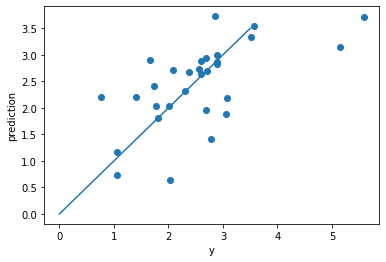

In [39]:
fig, ax = plt.subplots()
plt.xlabel('y')
plt.ylabel('prediction')
plt.plot([0, 3.5], [0, 3.5])
plt.scatter(y_test, y_pred)

In [40]:
# Question 4

In [41]:
MSE = [0] * 15

In [72]:
[0] * 15

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
np.zeros(15)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
np.ones(15)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
for k in range(1, 16):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    MSE[k-1] = mean_squared_error(y_test, y_pred)
MSE

[1.3795858731891253,
 0.9248916376349593,
 0.6962854899503435,
 0.6172386488220023,
 0.6772141876165387,
 0.6602449006455746,
 0.7461934800608266,
 0.7819454155340702,
 0.7485111941838746,
 0.7447805977158086,
 0.7438203874114898,
 0.7049888350540215,
 0.7072512454217635,
 0.6648079566911367,
 0.6845543932253605]

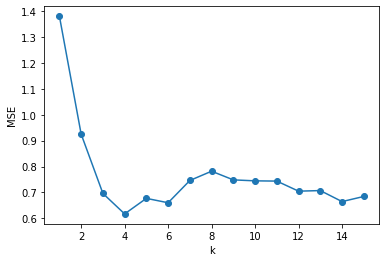

In [43]:
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(range(1, 16), MSE)
plt.scatter(range(1, 16), MSE)

In [44]:
# Part II

In [45]:
# Q1

In [46]:
mu1 = [0, 1]
mu2 = [0, 2]
mu3 = [2, 0]
Sigma1 = [[1, 0.5], [0.5, 2]]
Sigma2 = [[2, -0.5], [-0.5, 1]]
Sigma3 = [[1, 0], [0, 1]]

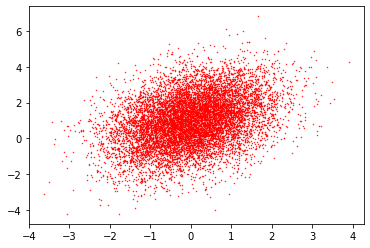

In [47]:
xy = np.random.multivariate_normal(mu1, Sigma1, 10000)
plt.scatter(xy[:, 0], xy[:, 1], c='r', s=0.2)

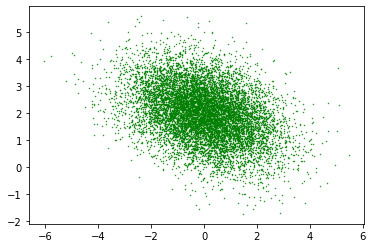

In [48]:
xy = np.random.multivariate_normal(mu2, Sigma2, 10000)
plt.scatter(xy[:, 0], xy[:, 1], c='g', s=0.2)

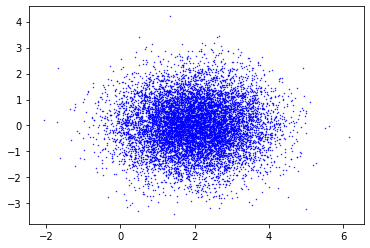

In [49]:
xy = np.random.multivariate_normal(mu3, Sigma3, 10000)
plt.scatter(xy[:, 0], xy[:, 1], c='b', s=0.2)

In [50]:
def gen_data(N, mu1, mu2, mu3, Sigma1, Sigma2, Sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, Sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, Sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, Sigma3, N3)
    return dict({'X':X, 'y':y})

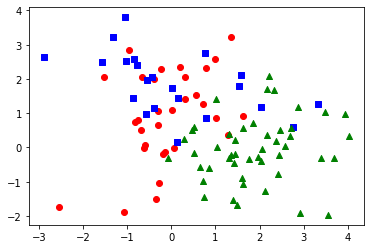

In [51]:
train = gen_data(100,mu1,mu2,mu3,Sigma1,Sigma2,Sigma3,p1=0.3,p2=0.2)
plt.scatter(train['X'][train['y']==1, 0], train['X'][train['y']==1, 1], c='r', marker='o')
plt.scatter(train['X'][train['y']==2, 0], train['X'][train['y']==2, 1], c='b', marker='s')
plt.scatter(train['X'][train['y']==3, 0], train['X'][train['y']==3, 1], c='g', marker='^')

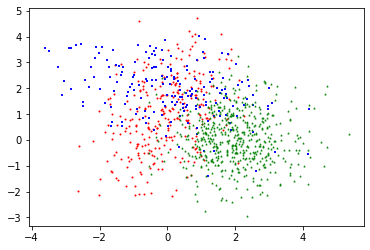

In [52]:
test = gen_data(1000,mu1,mu2,mu3,Sigma1,Sigma2,Sigma3,p1=0.3,p2=0.2)
plt.scatter(test['X'][test['y']==1, 0], test['X'][test['y']==1, 1], c='r', marker='o', s=1)
plt.scatter(test['X'][test['y']==2, 0], test['X'][test['y']==2, 1], c='b', marker='s', s=1)
plt.scatter(test['X'][test['y']==3, 0], test['X'][test['y']==3, 1], c='g', marker='^', s=1)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn_classifier.fit(train['X'], train['y'])

KNeighborsClassifier()

In [56]:
print(knn_classifier.score(test['X'], test['y']))

0.745


In [57]:
y_pred = knn_classifier.predict(test['X'])
y_pred

array([3, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 2,
       1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3,
       2, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 1, 1, 3, 2, 3, 3, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 3, 1, 1,
       2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1,
       3, 1, 1, 3, 2, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 3, 2, 3, 3, 3, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3,
       1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 1, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 1,
       2, 3, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 3, 3, 1,

In [58]:
mean_squared_error(test['y'], y_pred)

0.513

In [59]:
test['y'] == y_pred

array([ True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
        True, False,

In [60]:
np.mean(test['y'] == y_pred)

0.745

In [61]:
err = np.mean(test['y'] != y_pred)
err

0.255

In [62]:
#Q4

In [63]:
M = 10
Kmax = 20
ERR100 = np.zeros((M, Kmax))
ERR500 = np.zeros((M, Kmax))

In [64]:
ERR100[9, 2]

0.0

In [65]:
for m in range(M):
    print(m+1)
    train100 = gen_data(100,mu1,mu2,mu3,Sigma1,Sigma2,Sigma3,p1=0.3,p2=0.2)
    train500 = gen_data(500,mu1,mu2,mu3,Sigma1,Sigma2,Sigma3,p1=0.3,p2=0.2)
    for k in range(Kmax):
        knn_classifier = KNeighborsClassifier(n_neighbors=k+1)
        knn_classifier.fit(train100['X'], train100['y'])
        y_pred = knn_classifier.predict(test['X'])
        ERR100[m, k] = np.mean(test['y'] != y_pred)
        
        knn_classifier = KNeighborsClassifier(n_neighbors=k+1)
        knn_classifier.fit(train500['X'], train500['y'])
        y_pred = knn_classifier.predict(test['X'])
        ERR500[m, k] = np.mean(test['y'] != y_pred)

1
2
3
4
5
6
7
8
9
10


In [66]:
err100 = np.mean(ERR100, axis=0)
err500 = np.mean(ERR500, axis=0)

In [67]:
err100

array([0.3168, 0.3357, 0.2851, 0.284 , 0.2759, 0.2758, 0.2682, 0.2699,
       0.2655, 0.2655, 0.2573, 0.2618, 0.259 , 0.2595, 0.2599, 0.2585,
       0.2591, 0.2616, 0.2617, 0.262 ])

In [68]:
err500

array([0.3172, 0.3305, 0.2792, 0.2764, 0.2642, 0.2572, 0.2512, 0.2487,
       0.2466, 0.2457, 0.2468, 0.2383, 0.2401, 0.2358, 0.2399, 0.2371,
       0.238 , 0.2382, 0.2376, 0.2375])

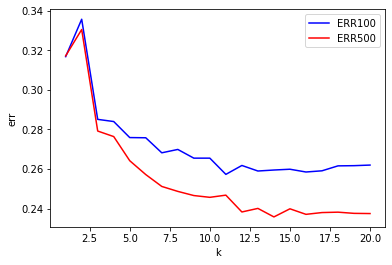

In [69]:
fig, ax = plt.subplots()
plt.xlabel('k')
plt.ylabel('err')
plt.plot(np.array(range(1, (Kmax+1))), err100, c='blue', label='ERR100')
plt.plot(np.array(range(1, (Kmax+1))), err500, c='red', label='ERR500')
plt.legend()